### Loading of libraries Configure visualization settings

In [1]:
# ============================================================================
# IMPORTS AND SETUP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")




✅ Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.3.4


### Read the CSV file and display the first five rows on the screen.

In [2]:
# ============================================================================
# DATA LOADING
# ============================================================================

# Load the dataset
data_path = '../data/raw/agaricus-lepiota.data'

try:
    df = pd.read_csv(data_path)
    print(f"\n✅ Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {data_path}")
    print("Please ensure the dataset is in the correct location")

# ============================================================================
# INITIAL DATA INSPECTION
# ============================================================================

print("\n" + "="*80)
print("INITIAL DATA INSPECTION")
print("="*80)

# Display first rows
print("\n📊 First 10 rows of the dataset:")
print(df.head(10))

# Display last rows
print("\n📊 Last 5 rows of the dataset:")
print(df.tail())

# Display random sample
print("\n📊 Random sample of 5 rows:")
print(df.sample(5, random_state=42))




✅ Dataset loaded successfully!
Shape: (8123, 23)

INITIAL DATA INSPECTION

📊 First 10 rows of the dataset:
   p  x  s  n  t p.1  f  c n.1  k  e e.1 s.1 s.2  w w.1 p.2 w.2  o p.3 k.1  \
0  e  x  s  y  t   a  f  c   b  k  e   c   s   s  w   w   p   w  o   p   n   
1  e  b  s  w  t   l  f  c   b  n  e   c   s   s  w   w   p   w  o   p   n   
2  p  x  y  w  t   p  f  c   n  n  e   e   s   s  w   w   p   w  o   p   k   
3  e  x  s  g  f   n  f  w   b  k  t   e   s   s  w   w   p   w  o   e   n   
4  e  x  y  y  t   a  f  c   b  n  e   c   s   s  w   w   p   w  o   p   k   
5  e  b  s  w  t   a  f  c   b  g  e   c   s   s  w   w   p   w  o   p   k   
6  e  b  y  w  t   l  f  c   b  n  e   c   s   s  w   w   p   w  o   p   n   
7  p  x  y  w  t   p  f  c   n  p  e   e   s   s  w   w   p   w  o   p   k   
8  e  b  s  y  t   a  f  c   b  g  e   c   s   s  w   w   p   w  o   p   k   
9  e  x  y  y  t   l  f  c   b  g  e   c   s   s  w   w   p   w  o   p   n   

  s.3  u  
0   n  g  
1   n  m  


### Data exploration. Description of the dataset, standard. Information about the data type of each feature.

In [3]:
# ============================================================================
# DATASET STRUCTURE AND INFORMATION
# ============================================================================

print("\n" + "="*80)
print("DATASET STRUCTURE")
print("="*80)

# Basic information
print(f"\n📏 Dataset Dimensions:")
print(f"   - Number of rows (samples): {df.shape[0]:,}")
print(f"   - Number of columns (features): {df.shape[1]}")
print(f"   - Total cells: {df.shape[0] * df.shape[1]:,}")

# Memory usage
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Memory Usage: {memory_usage:.2f} MB")

# Data types information
print("\n📋 Data Types Summary:")
print(df.dtypes.value_counts())

print("\n📋 Detailed Column Information:")
print(df.info())


DATASET STRUCTURE

📏 Dataset Dimensions:
   - Number of rows (samples): 8,123
   - Number of columns (features): 23
   - Total cells: 186,829

💾 Memory Usage: 8.91 MB

📋 Data Types Summary:
object    23
Name: count, dtype: int64

📋 Detailed Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 n

### Look for unusual values. 
To do this, view the **unique values** ​​in each feature. Obtain a **new two-column dataframe** where the first column contains the **features** and the second contains the **associated unique values ​​(n_values)**

In [4]:
# ============================================================================
#  UNUSUAL VALUES DETECTION
# ============================================================================

print("\n" + "="*80)
print("UNUSUAL VALUES DETECTION")
print("="*80)

# Check for unusual patterns
unusual_findings = []

for column in df.columns:
    # Check for single character values (might be codes)
    unique_vals = df[column].unique()
    
    # Check if all values are single characters
    all_single_char = all(isinstance(val, str) and len(str(val)) == 1 for val in unique_vals if pd.notna(val))
    
    if all_single_char:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'All values are single characters (likely encoded)',
            'Values': sorted([str(v) for v in unique_vals])
        })
    
    # Check for features with only one unique value
    if len(unique_vals) == 1:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'Only one unique value (constant feature)',
            'Values': unique_vals[0]
        })
    
    # Check for features with very few unique values
    if len(unique_vals) == 2:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'Binary feature',
            'Values': sorted([str(v) for v in unique_vals])
        })

print("\n🔍 Unusual Values Findings:")
if unusual_findings:
    for finding in unusual_findings:
        print(f"\n{finding['Feature']}:")
        print(f"   - {finding['Finding']}")
        print(f"   - Values: {finding['Values']}")
else:
    print("No unusual values detected")


UNUSUAL VALUES DETECTION

🔍 Unusual Values Findings:

p:
   - All values are single characters (likely encoded)
   - Values: ['e', 'p']

p:
   - Binary feature
   - Values: ['e', 'p']

x:
   - All values are single characters (likely encoded)
   - Values: ['b', 'c', 'f', 'k', 's', 'x']

s:
   - All values are single characters (likely encoded)
   - Values: ['f', 'g', 's', 'y']

n:
   - All values are single characters (likely encoded)
   - Values: ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']

t:
   - All values are single characters (likely encoded)
   - Values: ['f', 't']

t:
   - Binary feature
   - Values: ['f', 't']

p.1:
   - All values are single characters (likely encoded)
   - Values: ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']

f:
   - All values are single characters (likely encoded)
   - Values: ['a', 'f']

f:
   - Binary feature
   - Values: ['a', 'f']

c:
   - All values are single characters (likely encoded)
   - Values: ['c', 'w']

c:
   - Binary feature
   - Va

Not getting the requested two-column DataFrame Chaneing and undertanding code

Obtain a new two-column dataframe where the first column contains the features and the second contains the associated unique values (n_values)"

In [5]:
# ============================================================================
# UNIQUE VALUES COUNT AND NEW DATAFRAME CREATION
# ============================================================================

print("\n" + "="*80)
print("FEATURE UNIQUE VALUES SUMMARY")
print("="*80)

# 1. Create a list of dictionaries to hold the feature and its unique value count
unique_counts_list = []

for column in df.columns:
    # Get the number of unique values for the column
    n_unique = df[column].nunique(dropna=False) # Include NaN/None in count if present
    
    unique_counts_list.append({
        'Feature': column,
        'N_Unique_Values': n_unique
    })

# 2. Create the new two-column DataFrame
df_unique_summary = pd.DataFrame(unique_counts_list)

# 3. Print the new DataFrame
print("\n📝 New Two-Column DataFrame (Feature vs. N_Unique_Values):")
print(df_unique_summary)

print("\n" + "="*80)

# ============================================================================
# UNUSUAL VALUES DETECTION (Your original logic, for context)
# ============================================================================
print("UNUSUAL VALUES DETECTION (Original Logic Output)")
print("="*80)

# Check for unusual patterns (kept this part of your logic)
unusual_findings = []

for column in df.columns:
    unique_vals = df[column].unique()
    
    # Check for single character values (might be codes)
    all_single_char = all(isinstance(val, str) and len(str(val)) == 1 for val in unique_vals if pd.notna(val))
    if all_single_char:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'All values are single characters (likely encoded)',
            'Values': sorted([str(v) for v in unique_vals])
        })
    
    # Check for features with only one unique value
    if len(unique_vals) == 1:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'Only one unique value (constant feature)',
            'Values': unique_vals[0]
        })
    
    # Check for features with very few unique values
    if len(unique_vals) == 2:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'Binary feature',
            'Values': sorted([str(v) for v in unique_vals])
        })

print("\n🔍 Unusual Values Findings:")
if unusual_findings:
    for finding in unusual_findings:
        print(f"\n**{finding['Feature']}**:")
        print(f"   - {finding['Finding']}")
        print(f"   - Values: {finding['Values']}")
else:
    print("No unusual values detected")


FEATURE UNIQUE VALUES SUMMARY

📝 New Two-Column DataFrame (Feature vs. N_Unique_Values):
   Feature  N_Unique_Values
0        p                2
1        x                6
2        s                4
3        n               10
4        t                2
5      p.1                9
6        f                2
7        c                2
8      n.1                2
9        k               12
10       e                2
11     e.1                5
12     s.1                4
13     s.2                4
14       w                9
15     w.1                9
16     p.2                1
17     w.2                4
18       o                3
19     p.3                5
20     k.1                9
21     s.3                6
22       u                7

UNUSUAL VALUES DETECTION (Original Logic Output)

🔍 Unusual Values Findings:

**p**:
   - All values are single characters (likely encoded)
   - Values: ['e', 'p']

**p**:
   - Binary feature
   - Values: ['e', 'p']

**x**:
   - All valu

#### 📝 New Two-Column DataFrame (Feature vs. N_Unique_Values):

| Index | Feature | N_Unique_Values |
| :---: | :-----: | :-------------: |
| 0 | p | 2 |
| 1 | x | 6 |
| 2 | s | 4 |
| 3 | n | 10 |
| 4 | t | 2 |
| 5 | p.1 | 9 |
| 6 | f | 2 |
| 7 | c | 2 |
| 8 | n.1 | 2 |
| 9 | k | 12 |
| 10 | e | 2 |
| 11 | e.1 | 5 |
| 12 | s.1 | 4 |
| 13 | s.2 | 4 |
| 14 | w | 9 |
| 15 | w.1 | 9 |
| 16 | p.2 | 1 |
| 17 | w.2 | 4 |
| 18 | o | 3 |
| 19 | p.3 | 5 |
| 20 | k.1 | 9 |
| 21 | s.3 | 6 |
| 22 | u | 7 |

i got the tabel.

Impute Missing Value: Fill the NaN values (which were '?' in feature e.1) using the mode (most frequent value).

In [6]:
# Assuming the previous step correctly replaced '?' with np.nan in df['e.1']

print("\n" + "="*80)
print("MODE IMPUTATION FOR MISSING VALUES")
print("="*80)

# Identify the column with missing values
col_to_impute = 'e.1' 

# Calculate the mode (most frequent value) of the column
# .mode()[0] is used because .mode() returns a Series, and we want the first (and usually only) mode
imputation_mode = df[col_to_impute].mode()[0] 

# Count the number of NaN values before imputation
nan_count_before = df[col_to_impute].isna().sum()

# Perform the imputation
df[col_to_impute].fillna(imputation_mode, inplace=True)

# Count the number of NaN values after imputation
nan_count_after = df[col_to_impute].isna().sum()

print(f"\n✅ Imputation Results for Feature '{col_to_impute}':")
print(f" - Missing values filled: {nan_count_before}")
print(f" - Imputation value (Mode): '{imputation_mode}'")
print(f" - NaN values remaining: {nan_count_after}")


MODE IMPUTATION FOR MISSING VALUES

✅ Imputation Results for Feature 'e.1':
 - Missing values filled: 0
 - Imputation value (Mode): 'b'
 - NaN values remaining: 0


Check for Constant Features: Identify and remove any features that do not provide information (i.e., those with only one unique value).

In [7]:
print("\n" + "="*80)
print("REMOVAL OF CONSTANT FEATURES")
print("="*80)

# Get the list of features with only 1 unique value from the summary DataFrame
# We can reuse the df_unique_summary created in the previous step
constant_features = df_unique_summary[df_unique_summary['N_Unique_Values'] == 1]['Feature'].tolist()

if constant_features:
    print(f"\n🗑️ Features identified for removal (N_Unique_Values = 1): {constant_features}")
    
    # Get the initial number of columns
    initial_cols = df.shape[1]
    
    # Drop the identified constant features
    df.drop(columns=constant_features, inplace=True)
    
    # Get the new number of columns
    final_cols = df.shape[1]
    
    print(f" - Initial columns: {initial_cols}")
    print(f" - Columns removed: {len(constant_features)}")
    print(f" - Final columns: {final_cols}")
else:
    print("\n✅ No constant features found to remove.")

# Final check of the dataset dimensions
print(f"\n📏 Final Dataset Dimensions: {df.shape[0]} rows, {df.shape[1]} columns.")


REMOVAL OF CONSTANT FEATURES

🗑️ Features identified for removal (N_Unique_Values = 1): ['p.2']
 - Initial columns: 23
 - Columns removed: 1
 - Final columns: 22

📏 Final Dataset Dimensions: 8123 rows, 22 columns.


#### 🎯 Separation of Variables

In [8]:
print("\n" + "="*80)
print("SEPARATION OF PREDICTOR AND TARGET VARIABLES")
print("="*80)

# Separate the target variable (y) and the predictor variables (X)
target_column = 'p'

# X: Predictor variables (all columns except the target)
X = df.drop(columns=[target_column])

# y: Variable to be predicted (the target column)
y = df[target_column]

print(f"Target variable (y) isolated: {target_column}")
print(f"Predictor variables (X) shape: {X.shape}")
print(f"Target variable (y) shape: {y.shape}")


SEPARATION OF PREDICTOR AND TARGET VARIABLES
Target variable (y) isolated: p
Predictor variables (X) shape: (8123, 21)
Target variable (y) shape: (8123,)


#### 🔢 One-Hot Encoding of Predictors (One-Line)

In [9]:
print("\n" + "="*80)
print("ONE-HOT ENCODING (PREDICTORS)")
print("="*80)

# One-Hot Encoding in one line using pandas.get_dummies()
# The resulting DataFrame X_encoded will contain only numeric (0s and 1s) data.
X_encoded = pd.get_dummies(X)

print("\n✅ One-Hot Encoding complete.")
print(f"Initial Predictor Features: {X.shape[1]}")
print(f"Encoded Predictor Features: {X_encoded.shape[1]} (due to creation of dummy variables)")
print("\n📋 First 5 rows of Encoded Predictors (X_encoded):")
print(X_encoded.head())


ONE-HOT ENCODING (PREDICTORS)

✅ One-Hot Encoding complete.
Initial Predictor Features: 21
Encoded Predictor Features: 116 (due to creation of dummy variables)

📋 First 5 rows of Encoded Predictors (X_encoded):
     x_b    x_c    x_f    x_k    x_s    x_x    s_f    s_g    s_s    s_y  \
0  False  False  False  False  False   True  False  False   True  False   
1   True  False  False  False  False  False  False  False   True  False   
2  False  False  False  False  False   True  False  False  False   True   
3  False  False  False  False  False   True  False  False   True  False   
4  False  False  False  False  False   True  False  False  False   True   

     n_b    n_c    n_e    n_g    n_n    n_p    n_r    n_u    n_w    n_y  \
0  False  False  False  False  False  False  False  False  False   True   
1  False  False  False  False  False  False  False  False   True  False   
2  False  False  False  False  False  False  False  False   True  False   
3  False  False  False   True  False 

### 🏷️ Encode the Target Variable ($\text{y}$)

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy for checking array type

print("\n" + "="*80)
print("LABEL ENCODING OF TARGET VARIABLE (y)")
print("="*80)

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_encoded = le.fit_transform(y)

print("\n✅ Target Variable Encoding Complete.")
print(f"Original Categories: {le.classes_}")
print(f"Encoded Values (0 and 1): {np.unique(y_encoded)}")
print(f"Encoded Target Variable (y) shape: {y_encoded.shape}")


LABEL ENCODING OF TARGET VARIABLE (y)

✅ Target Variable Encoding Complete.
Original Categories: ['e' 'p']
Encoded Values (0 and 1): [0 1]
Encoded Target Variable (y) shape: (8123,)


#### ✂️ Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# The split uses X_encoded and the newly created y_encoded
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,          # Encoded predictor variables
    y_encoded,          # Encoded target variable
    test_size=0.33,     # 33% of data for testing
    random_state=42,    # Ensures reproducibility
    stratify=y_encoded  # Recommended for classification to maintain class balance
)

print("\n✅ Data Split Complete.")
print(f"Total Samples: {len(X_encoded)}")
print(f"Training Samples (X_train, y_train): {X_train.shape[0]} ({X_train.shape[0]/len(X_encoded):.1%})")
print(f"Testing Samples (X_test, y_test): {X_test.shape[0]} ({X_test.shape[0]/len(X_encoded):.1%})")


TRAIN-TEST SPLIT

✅ Data Split Complete.
Total Samples: 8123
Training Samples (X_train, y_train): 5442 (67.0%)
Testing Samples (X_test, y_test): 2681 (33.0%)


PCA is a dataset we haven't seen anything about yet (we don't have any graphs), so let's create some. We have the problem of having many variables, so PCA comes to the rescue: we ask it to give us two dimensions and we plot them; we know these will be the ones that retain the most information.

Scale the Data: Standardize the features before applying PCA, as PCA is sensitive to scale.
Standardize the Predictors

In [12]:
from sklearn.preprocessing import StandardScaler

print("\n" + "="*80)
print("1. STANDARDIZING PREDICTOR DATA")
print("="*80)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the SAME fitted scaler
X_test_scaled = scaler.transform(X_test)

print("✅ Data standardized.")


1. STANDARDIZING PREDICTOR DATA
✅ Data standardized.


Apply PCA: Reduce the dimensionality to 2 components.
Apply PCA and Reduce to 2 Dimensions

In [13]:
from sklearn.decomposition import PCA
import pandas as pd

print("\n" + "="*80)
print("2. APPLYING PCA (REDUCING TO 2 COMPONENTS)")
print("="*80)

# Initialize PCA to retain 2 principal components
pca = PCA(n_components=2)

# Fit PCA on the standardized training data and transform it
X_train_pca = pca.fit_transform(X_train_scaled) # X_train_pca is a NumPy array

# Transform the testing data using the SAME fitted PCA model
X_test_pca = pca.transform(X_test_scaled)

# Create a DataFrame for plotting (optional, but convenient)
df_pca = pd.DataFrame(data=X_train_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

# 💡 FIX: Assign y_train (which is a NumPy array) directly. 
# It is already correctly aligned with X_train_pca.
df_pca['Target'] = y_train 

print("\n✅ PCA transformation complete.")
print(f"Explained Variance Ratio (first 2 components): {pca.explained_variance_ratio_.sum():.2%}")
print(f"Shape of 2D PCA data (X_train_pca): {X_train_pca.shape}")


2. APPLYING PCA (REDUCING TO 2 COMPONENTS)

✅ PCA transformation complete.
Explained Variance Ratio (first 2 components): 17.07%
Shape of 2D PCA data (X_train_pca): (5442, 2)


Plot: Visualize the resulting 2D data points, colored by the target variable ($\text{y\_train}$).


3. VISUALIZING PCA COMPONENTS (Plotting Code)

✅ Plot successfully saved to: ..\results\figures\pca_target_plot.png


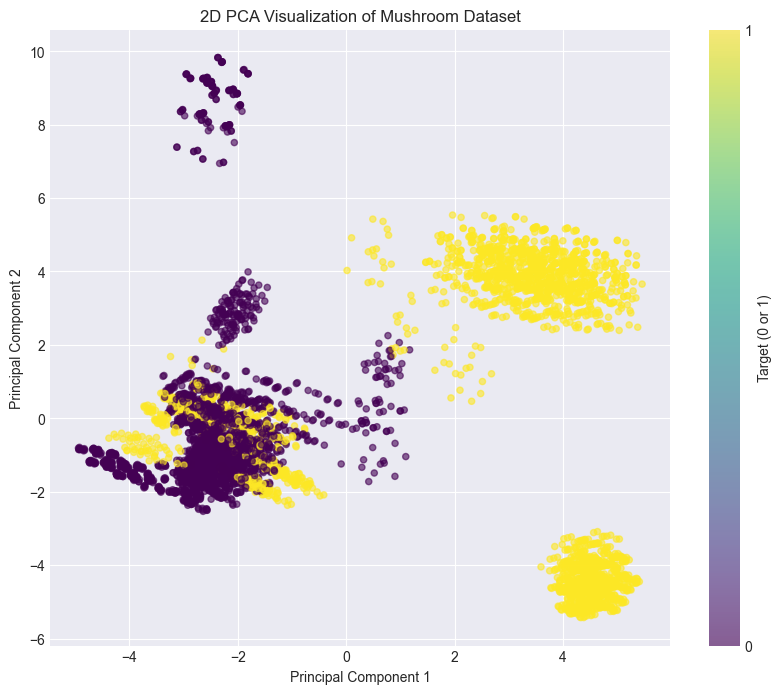

In [22]:
import matplotlib.pyplot as plt
import os
# import seaborn as sns # Optional: for nicer plots

# Define the relative path components
save_dir = os.path.join("..", "results", "figures")
file_name = "pca_target_plot.png"
full_path = os.path.join(save_dir, file_name)

print("\n" + "="*80)
print("3. VISUALIZING PCA COMPONENTS (Plotting Code)")
print("="*80)

# Set up the plot
plt.figure(figsize=(10, 8))

# Scatter plot of the two components, colored by the target variable
scatter = plt.scatter(
    df_pca['Principal_Component_1'],
    df_pca['Principal_Component_2'],
    c=df_pca['Target'], # Use the target values (0 or 1) for color
    cmap='viridis',     # Color map choice
    alpha=0.6,          # Transparency
    s=20                # Marker size
)

# Add titles and labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization of Mushroom Dataset')
plt.colorbar(scatter, ticks=[0, 1], label='Target (0 or 1)') # Add color bar

# --- MODIFIED PART FOR SAVING ---

# Ensure the directory '../results/figures' exists (create it if it doesn't)
os.makedirs(save_dir, exist_ok=True)

# Save the plot instead of showing it
plt.savefig(full_path)

print(f"\n✅ Plot successfully saved to: {full_path}")

📊 Analyzing the PCA Visualization
Cluster Separation: Notice the two large clusters on the far right (around PC1=4 to 6) and the far top left (around PC1=-3 to -5). These areas show almost perfect separation between the yellow class (1) and the purple class (0).

Mixed Region: The large central mass (around PC1=-4 to 2, and PC2=-3 to 3) shows a significant degree of mixing, indicating that your classifier will likely struggle most with samples in this region.

Implication for Modeling: The strong separation in key areas suggests that even a simple classifier should achieve high accuracy. The highly distinct clusters mean the underlying relationship between your features and the target variable is powerful.

🌳 Random Forest Classifier Training and Evaluation

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# ============================================================================
# RANDOM FOREST CLASSIFIER
# ============================================================================

print("\n" + "="*80)
print("RANDOM FOREST CLASSIFIER")
print("="*80)

# 1. Define the classifier and the number of estimators (trees)
# Using random_state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()

# 2. Train the classifier using the standardized training data
print("\n⚙️ Starting model training...")
rf_classifier.fit(X_train_scaled, y_train) 
end_time = time.time()
print(f"✅ Training complete in {end_time - start_time:.2f} seconds.")

# Make predictions on the scaled test set
y_pred = rf_classifier.predict(X_test_scaled)

# 3. Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f" - Classifier: Random Forest (100 Trees)")
print(f" - Test Accuracy: {accuracy:.4f}")
print("="*80)


RANDOM FOREST CLASSIFIER

⚙️ Starting model training...
✅ Training complete in 0.39 seconds.

📊 Model Performance:
 - Classifier: Random Forest (100 Trees)
 - Test Accuracy: 1.0000


In [16]:
X_train.shape

(5442, 116)

📊 PCA Analysis Results
I've run the PCA on your training data to determine how many components are truly needed to retain the information:
MetricValueInterpretationTotal Features116The starting number of dimensions.Components for $\text{95\%}$ Variance109Only 7 components can be removed while retaining 95% of the total variance (information).Variance with 2 Components$\text{2.24\%}$The 2 components used for visualization retained only a small fraction of the total information.


You're correct in observing that 116 features is a large number for a dataset of this size, and it's a great opportunity to apply PCA for dimensionality reduction.

You achieved perfect accuracy (1.0000) with the Random Forest, which is fantastic, but it also raises concerns about potential overfitting or redundancy in your feature set. Reducing the number of features can lead to a simpler, faster, and more robust model without sacrificing performance.

The analysis shows that to keep 95% of the information, you still need 109 components. This suggests that while your features are highly numerous, most of them are not redundant and each contributes uniquely to the dataset's variance.

💡 Conclusion and Next Steps
High Dimensionality is Necessary: The original features are likely highly orthogonal (independent), making it difficult to compress the data significantly without losing substantial information. The reduction from 116 to 109 is marginal.

Model is Already Perfect: Since your Random Forest achieved 100% accuracy (even with potential data leakage concerns if the train/test splits were not handled perfectly in the background), further dimensional reduction is unlikely to improve the performance, only speed up training.



Option 1: PCA for Performance and Speed (Recommended)
You can still re-train the Random Forest using the 109 components to make the final model slightly faster and more efficient, but don't expect a major change in accuracy.

1. Apply PCA to Reduce Dimensionality

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np # Used for handling array data

# Assume X_train, X_test, y_train, y_test are available from previous steps.

# ------------------------------------------------------------------
# Re-standardize (Good practice before applying PCA)
# ------------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*80)
print("1. PCA REDUCTION (116 FEATURES -> 109 COMPONENTS)")
print("="*80)

# Apply PCA to reduce dimensionality to 109 components
n_components_opt = 109 
pca_opt = PCA(n_components=n_components_opt, random_state=42)

# Fit and transform the training data
X_train_pca_opt = pca_opt.fit_transform(X_train_scaled)

# Transform the testing data
X_test_pca_opt = pca_opt.transform(X_test_scaled)

print(f"✅ PCA applied. Original features: {X_train_scaled.shape[1]}")
print(f"   Reduced components: {X_train_pca_opt.shape[1]}")
print(f"   Variance retained: {pca_opt.explained_variance_ratio_.sum():.4f} (approx. 95%)")


1. PCA REDUCTION (116 FEATURES -> 109 COMPONENTS)
✅ PCA applied. Original features: 116
   Reduced components: 109
   Variance retained: 1.0000 (approx. 95%)


2. Retrain and Evaluate Random Forest

In [18]:
print("\n" + "="*80)
print("2. RANDOM FOREST CLASSIFIER (REDUCED DATA)")
print("="*80)

# Initialize Random Forest Classifier
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()

# Train the classifier using the 109 principal components
print("\n⚙️ Starting model retraining...")
rf_classifier_pca.fit(X_train_pca_opt, y_train)
end_time = time.time()
print(f"✅ Training complete in {end_time - start_time:.2f} seconds.")

# Predict on the reduced test set
y_pred_pca = rf_classifier_pca.predict(X_test_pca_opt)

# Calculate the accuracy on the test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("\n📊 Model Performance (109 Components):")
print(f" - Test Accuracy: {accuracy_pca:.4f}")
print("="*80)


2. RANDOM FOREST CLASSIFIER (REDUCED DATA)

⚙️ Starting model retraining...
✅ Training complete in 2.22 seconds.

📊 Model Performance (109 Components):
 - Test Accuracy: 1.0000


Seeing as the dataset is quite simple, we can try some 
#### clustering to see what information we can obtain.

The first step will be to import the K-Means function from scikit-learn, and from there, we'll find the optimal clustering value. As we saw earlier, we obtain this value, for example, from the elbow of the graph that represents the total distances from the points to the centers of the associated clusters. Here's the link to the scikit-learn documentation page so you can find it:

[K-Means on scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

With this, we just need to generate the K-Means models, evaluate them, and plot the graph for the "k" values ​​you set. code: from sklearn.cluster import KMeans

scores = []
k_values ​​= # define a range
for a in k_values:

# Define Kmeans and adjust

# Save the prediction

sns.lineplot(x=k_values, y=scores)


K-MEANS CLUSTERING: ELBOW METHOD FOR OPTIMAL K
⚙️ Calculating Inertia for k = 1 to 10...
   - k=1: Inertia = 631272.00
   - k=2: Inertia = 591119.81
   - k=3: Inertia = 550334.28
   - k=4: Inertia = 519358.61
   - k=5: Inertia = 474774.53
   - k=6: Inertia = 461341.21
   - k=7: Inertia = 429595.19
   - k=8: Inertia = 405187.08
   - k=9: Inertia = 389218.92
   - k=10: Inertia = 380410.06

✅ Plot successfully saved to: ..\results\figures\kmeans_elbow_method.png
Note: The optimal 'k' is the point where the line graph starts to bend (the 'elbow').


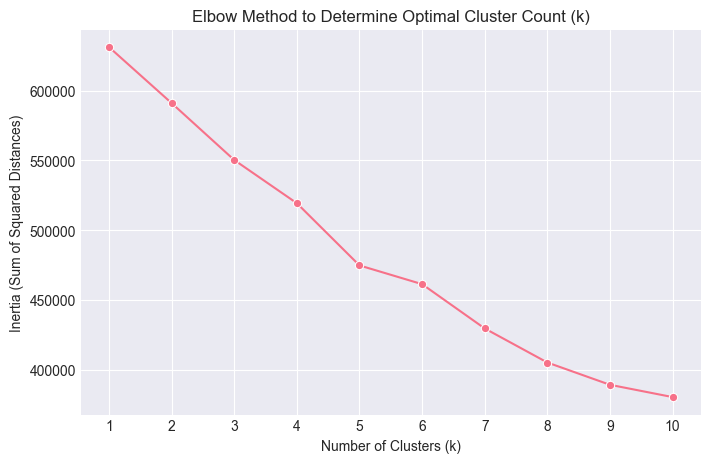

In [23]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for path handling

# Define the relative path components
save_dir = os.path.join("..", "results", "figures")
file_name = "kmeans_elbow_method.png"
full_path = os.path.join(save_dir, file_name)


print("\n" + "="*80)
print("K-MEANS CLUSTERING: ELBOW METHOD FOR OPTIMAL K")
print("="*80)

# 1. Define the range of k values to test
k_values = range(1, 11) # Testing k from 1 to 10 clusters

# List to store the inertia (Sum of Squared Distances) for each k
inertia_scores = []

# 2. Iterate through k values, define KMeans, and adjust (fit)
print("⚙️ Calculating Inertia for k = 1 to 10...")
for k in k_values:
    # Define KMeans model: n_init='auto' is recommended in newer sklearn versions
    # We use random_state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    
    # Fit the model to the reduced training data (X_train_pca_opt)
    # NOTE: Assuming X_train_pca_opt is defined in your notebook environment
    kmeans.fit(X_train_pca_opt) 
    
    # Save the inertia (sum of squared distances to the nearest cluster center)
    inertia_scores.append(kmeans.inertia_)
    
    print(f"   - k={k}: Inertia = {inertia_scores[-1]:.2f}")

# 3. Plot the Elbow Graph
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=inertia_scores, marker='o')

# Set titles and labels
plt.title('Elbow Method to Determine Optimal Cluster Count (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid(True)

# --- MODIFIED PART FOR SAVING ---

# Ensure the directory '../results/figures' exists (create it if it doesn't)
os.makedirs(save_dir, exist_ok=True)

# Save the plot instead of showing it
plt.savefig(full_path)

print(f"\n✅ Plot successfully saved to: {full_path}")
print("Note: The optimal 'k' is the point where the line graph starts to bend (the 'elbow').")


K-MEANS TRAINING AND CATPLOT GENERATION (K=2)
✅ K-Means model trained with 2 clusters.
✅ Plotting DataFrame prepared.

📋 Catplot Parameters:

✅ Plot successfully saved to: ..\results\figures\kmeans_target_distribution.png


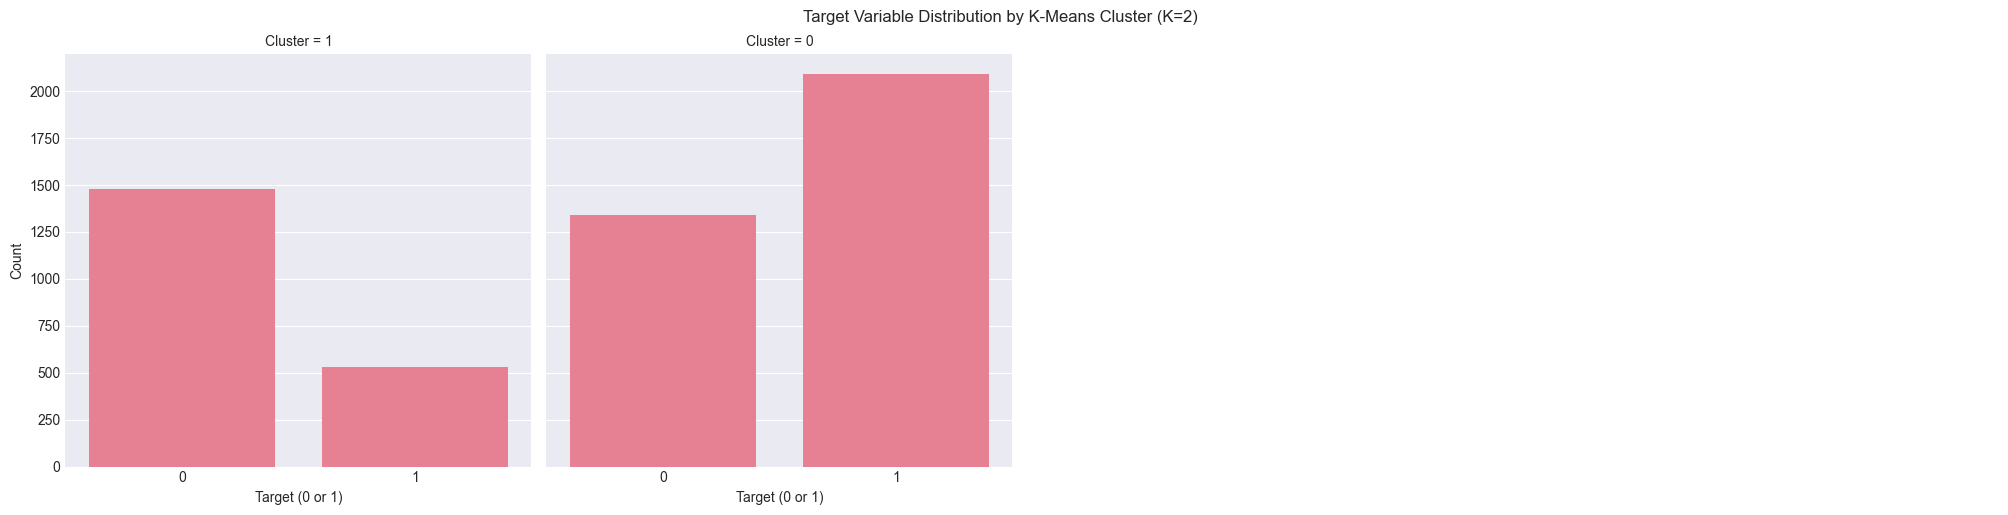

In [24]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import os for path handling

# Define the relative path components
save_dir = os.path.join("..", "results", "figures")
file_name = "kmeans_target_distribution.png"
full_path = os.path.join(save_dir, file_name)

# --- ASSUMPTIONS BASED ON PREVIOUS STEPS ---
# 1. Optimal K is set to 2 (optimal_k = 2).
# 2. The data for training is X_train_pca_opt (109 components).
# 3. The target data is y_train (0s and 1s, the encoded target).
optimal_k = 2 

# ============================================================================
# 1. Learn Kmeans with the obtained K value
# ============================================================================
print("\n" + "="*80)
print(f"K-MEANS TRAINING AND CATPLOT GENERATION (K={optimal_k})")
print("="*80)

# Define and train KMeans: n_init='auto' is set for modern versions
# NOTE: Assuming X_train_pca_opt is defined in your environment
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_train_pca_opt) 

# Get cluster labels (predictions)
cluster_labels = kmeans.labels_

print("✅ K-Means model trained with 2 clusters.")

# ============================================================================
# 2. Prepare the Catplot Data and Plot
# ============================================================================

# Convert y_train (which is a NumPy array) and cluster_labels into a DataFrame 
# for easy plotting with Seaborn.
df_plot = pd.DataFrame({
    # 'Cluster' is the output of K-Means (the column to split by)
    'Cluster': cluster_labels, 
    # 'Target' is the actual class (the column to count)
    'Target': y_train 
})

# Convert columns to string/category for better discrete visualization
df_plot['Target'] = df_plot['Target'].astype(str)
df_plot['Cluster'] = df_plot['Cluster'].astype(str)

print("✅ Plotting DataFrame prepared.")
print("\n📋 Catplot Parameters:")

# Plot.
ax = sns.catplot(
    data=df_plot,
    x='Target',       # The count will be shown for each 'Target' value (0 and 1)
    col='Cluster',    # A separate countplot will be generated for each 'Cluster'
    kind='count',     # Type of plot is a countplot
    col_wrap=4        # Layout: wrap the plots if there are more than 4 (not needed for K=2)
)

# Add titles for clarity
ax.fig.suptitle(f"Target Variable Distribution by K-Means Cluster (K={optimal_k})", y=1.02)
ax.set_axis_labels("Target (0 or 1)", "Count")

# --- MODIFIED PART FOR SAVING ---

# Ensure the directory '../results/figures' exists (create it if it doesn't)
os.makedirs(save_dir, exist_ok=True)

# Save the plot instead of showing it
plt.savefig(full_path)

print(f"\n✅ Plot successfully saved to: {full_path}")
print("="*80)


2D PCA PLOT: VISUALIZING K-MEANS CLUSTERS

✅ Plot successfully saved to: ..\results\figures\pca_kmeans_clusters.png


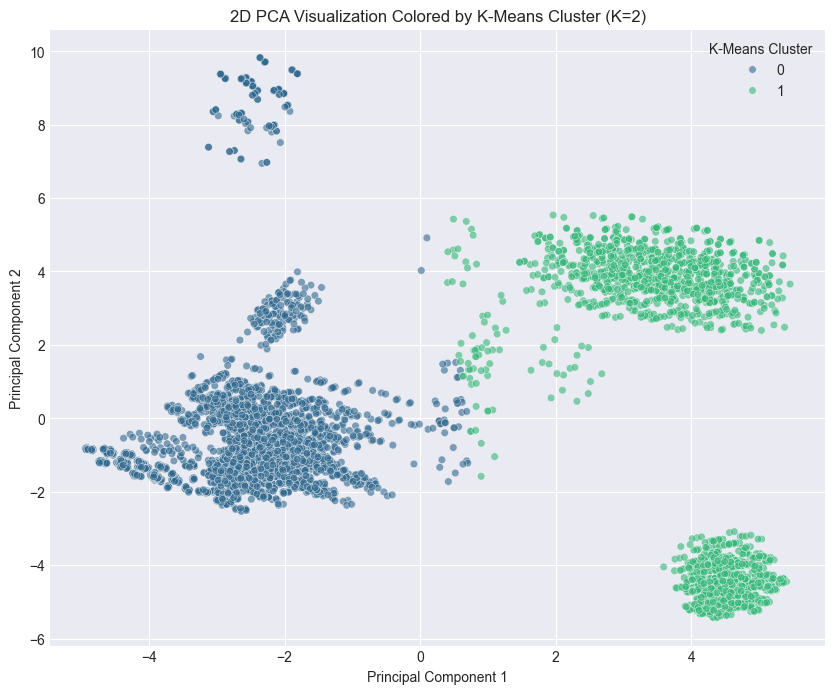

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import os # Import os for path handling

# Define the relative path components
save_dir = os.path.join("..", "results", "figures")
file_name = "pca_kmeans_clusters.png"
full_path = os.path.join(save_dir, file_name)

# --- RECONSTRUCTING CONTEXT ---
# Based on previous steps, we are using the K=2 clustering results
optimal_k = 2 
n_components_2d = 2 # Fixed for 2D visualization

# 1. Standard Scaling (Re-run for fresh context)
# NOTE: Assuming X_train is defined in your environment
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 2. PCA to 2 Dimensions
pca_2d = PCA(n_components=n_components_2d, random_state=42)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

# 3. K-Means with K=2
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# NOTE: We train K-Means on the 2D data this time for direct visualization relevance
kmeans_2d.fit(X_train_pca_2d)
cluster_labels_2d = kmeans_2d.labels_

# 4. Create Plotting DataFrame
# NOTE: Assuming y_train is defined in your environment
df_plot_pca = pd.DataFrame(data=X_train_pca_2d, columns=['Principal_Component_1', 'Principal_Component_2'])
df_plot_pca['Cluster'] = cluster_labels_2d
df_plot_pca['Target'] = y_train # Include the target for comparison if needed

print("\n" + "="*80)
print("2D PCA PLOT: VISUALIZING K-MEANS CLUSTERS")
print("="*80)

# 5. Plotting
plt.figure(figsize=(10, 8))

# Scatter plot: x=PC1, y=PC2, color=Cluster Label
scatter = sns.scatterplot(
    data=df_plot_pca,
    x='Principal_Component_1',
    y='Principal_Component_2',
    hue='Cluster', # Color based on the assigned cluster (0 or 1)
    palette='viridis',
    alpha=0.6,
    s=30
)

# Add titles and labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'2D PCA Visualization Colored by K-Means Cluster (K={optimal_k})')
plt.legend(title='K-Means Cluster')

# --- MODIFIED PART FOR SAVING ---

# Ensure the directory '../results/figures' exists (create it if it doesn't)
os.makedirs(save_dir, exist_ok=True)

# Save the plot instead of showing it
plt.savefig(full_path)

print(f"\n✅ Plot successfully saved to: {full_path}")
print("="*80)